In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Drop irrelevant features
df.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True)


In [6]:
# Fill missing Age with median, Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\21118\AppData\Local\Temp\ipykernel_6584\1101293473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\21118\AppData\Local\Temp\ipykernel_6584\1101293473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male:0, female:1
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [9]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop Parch and SibSp
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,0,3,1,22.0,7.2500,False,True,2
1,1,1,0,38.0,71.2833,False,False,2
2,1,3,0,26.0,7.9250,False,True,1
3,1,1,0,35.0,53.1000,False,True,2
4,0,3,1,35.0,8.0500,False,True,1


In [11]:
#Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Survived', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('Survived', axis=1).columns)
y = df['Survived']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
model = LogisticRegression()
params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [14]:
y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[136  21]
 [ 31  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuracy: 0.8059701492537313


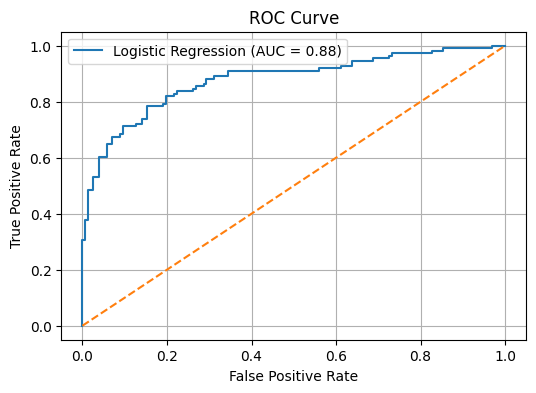

In [15]:
y_probs = best_model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

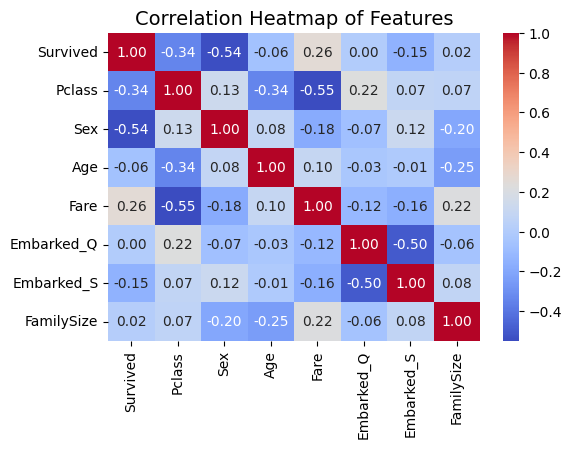

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


C:\Users\21118\AppData\Local\Temp\ipykernel_6584\1570283801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


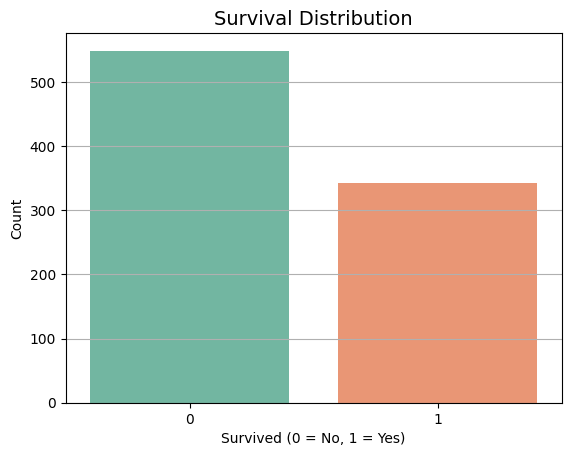

In [17]:
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Distribution", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


C:\Users\21118\AppData\Local\Temp\ipykernel_6584\1707995008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='muted')


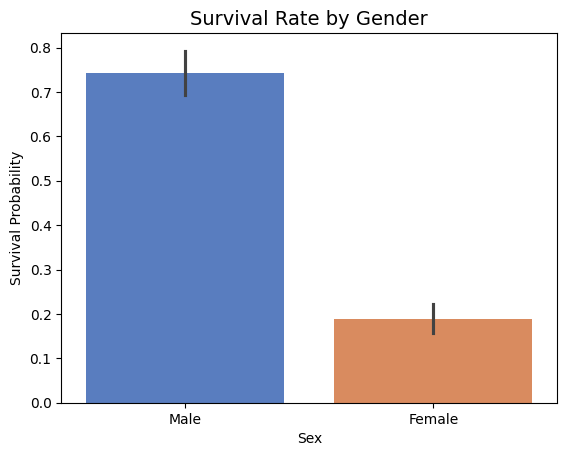

In [18]:
sns.barplot(x='Sex', y='Survived', data=df, palette='muted')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival Rate by Gender", fontsize=14)
plt.ylabel("Survival Probability")
plt.show()


C:\Users\21118\AppData\Local\Temp\ipykernel_6584\4105667443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, palette='Set3')


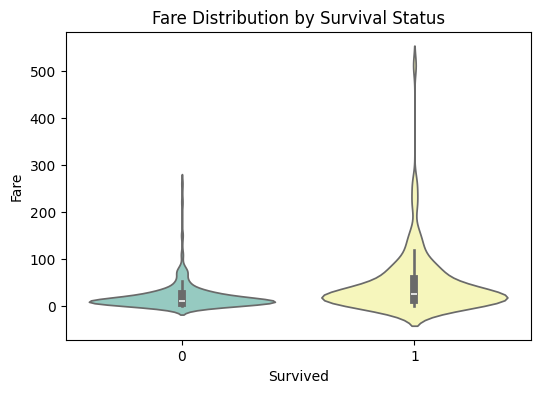

In [19]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()


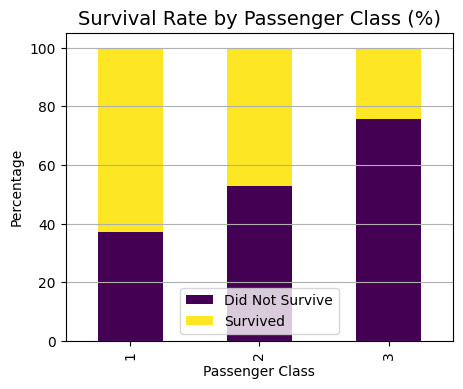

In [20]:
ct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(5, 4))
plt.title("Survival Rate by Passenger Class (%)", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.grid(axis='y')
plt.show()
